In [1]:
import pandas as pd
import numpy as np


In [2]:
raw_data=pd.read_csv('D:\KAGGLE DS\incomeprediction 20th century\Income Prediction\Train.csv',skipinitialspace=True)
raw_data

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit


<h2>To know about the variables</h3>

In [3]:
description=pd.read_csv('D:\KAGGLE DS\incomeprediction 20th century\Income Prediction\VariableDefinitions.csv')
description

,Column,Description
0,age,Age Of Individual
1,gender,Gender
2,education,Education
3,class,Class Of Worker
4,education_institute,Enrolled Educational Institution in last week
5,marital_status,Marital_Status
6,race,Race
7,is_hispanic,Hispanic Origin
8,employment_commitment,Full Or Part Time Employment Stat
9,unemployment_reason,Reason For Unemployment


In [4]:
data=raw_data.copy()
data.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     208617 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

<h1>Variables with missing values.</h1>

In [6]:
# Have a look at the values for people under 18 years.

data[data["age"] <= 18].head(5)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
11,ID_TZ0011,4,Male,Children,NaN,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1944.73,Below limit
13,ID_TZ0013,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2684.64,Below limit
16,ID_TZ0016,5,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,1340.44,Below limit
29,ID_TZ0029,14,Male,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,1652.34,Below limit


In [7]:
# Have a look at the values for people over 65 years.

data[data["age"] >= 65].head(5)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit
8,ID_TZ0008,73,Female,7th and 8th grade,NaN,NaN,Married-civilian spouse present,Black,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1267.30,Below limit
17,ID_TZ0017,88,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,102.21,Below limit


<h3>We can assume that if they're younger than 18 and arent classed in any professional class then they've never been employed
and if they're older than 65 and professionally unclass then there is a high probability they're retired.
</h3>

                                Missing values  Ratio
veterans_admin_questionnaire            207415  99.01
unemployment_reason                     202979  96.89
education_institute                     196197  93.65
old_residence_reg                       193148  92.20
old_residence_state                     193148  92.20
is_labor_union                          189420  90.42
under_18_family                         151654  72.39
residence_1_year_ago                    106284  50.73
occupation_code_main                    105694  50.45
class                                   105245  50.24
migration_prev_sunbelt                   88452  42.22
migration_code_change_in_msa              1588   0.76
migration_code_move_within_reg            1588   0.76
migration_code_change_in_reg              1588   0.76
is_hispanic                                882   0.42
****************************************************************************************************


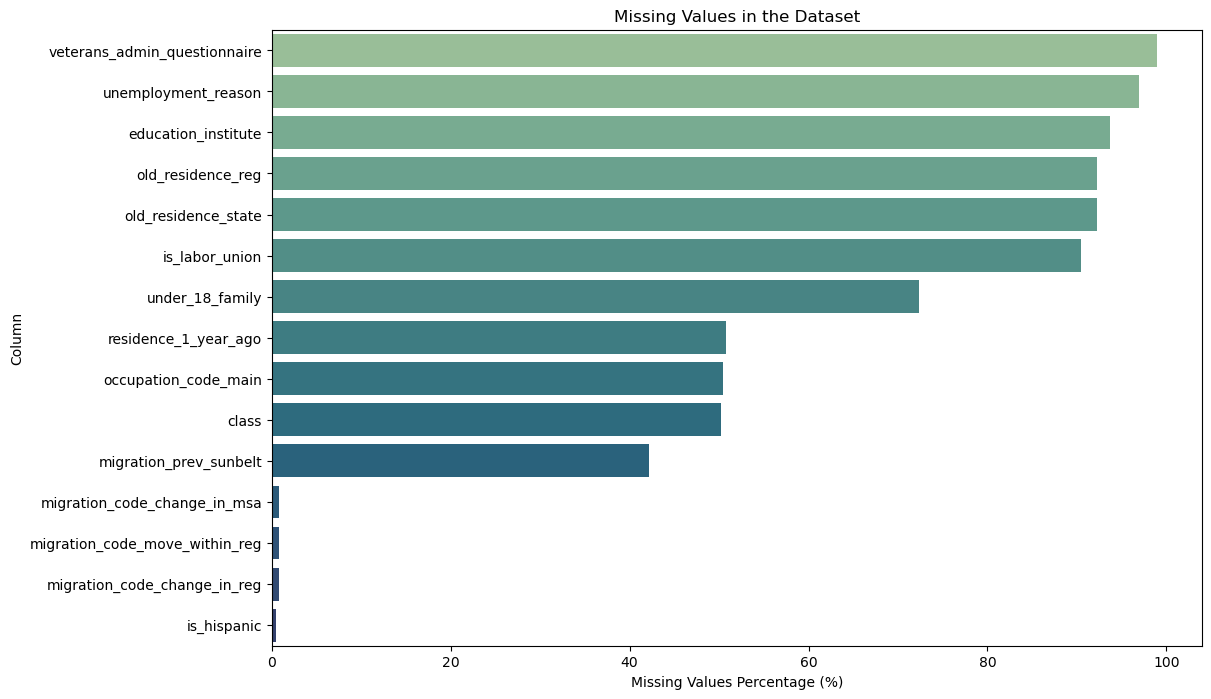

In [8]:
# Having a look at the variables with missing values.
import seaborn as sns
import matplotlib.pyplot as plt
def missing_values(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum()>0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_,2)], axis=1,keys=["Missing values", "Ratio"])
    missing_df= pd.DataFrame(missing_df)
    print(missing_df)
    print('*'*100)

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x="Ratio", y=missing_df.index, data=missing_df, palette="crest")
    ax.set(xlabel="Missing Values Percentage (%)", ylabel="Column", 
        title=f"Missing Values in the Dataset")
    plt.show()

missing_values(data)

In [9]:
from sklearn.impute import SimpleImputer

def impute_based_on_others(df):
    for col in df.columns:
        if df[col].dtype == "object":
            # For categorical variables:
            most_probable_values = df[col].dropna().mode().iloc[0]  
            df[col].fillna(most_probable_values, inplace=True)  
        else:
            # For numerical variables:
            imputer = SimpleImputer(strategy="most_frequent")
            df[col] = imputer.fit_transform(df[[col]])
    return df

## Apply the imputation function to the DataFrame
new_data = data.copy()
new_data

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit


<h1>Feature Encoding </h1>

In [10]:
#we will handle class 
x=new_data['class']
x.unique()

array([nan, 'Federal government', 'Private', 'Local government',
       'Self-employed-incorporated', 'Self-employed-not incorporated',
       'State government', 'Without pay', 'Never worked'], dtype=object)

In [11]:
y = []
for i in x:
    if i == 'Federal government' or i == 'Local government' or i == 'State government':
        y.append('Government')
    elif i == 'Self-employed-incorporated' or i == 'Self-employed-not incorporated':
        y.append('Self employed')
    elif i == 'Private':
        y.append('Private')
    else:
        y.append('No work')
        
#creating a datframe containintg origihnal and modified values
train_df=pd.DataFrame(x)
train_df['New_class']=y

In [12]:
education_values = new_data['education']
education_values.unique()

array(['High school graduate', '12th grade no diploma', 'Children',
       'Bachelors degree(BA AB BS)', '7th and 8th grade', '11th grade',
       '9th grade', 'Masters degree(MA MS MEng MEd MSW MBA)',
       '10th grade', 'Associates degree-academic program',
       '1st 2nd 3rd or 4th grade', 'Some college but no degree',
       'Less than 1st grade', 'Associates degree-occup /vocational',
       'Prof school degree (MD DDS DVM LLB JD)', '5th or 6th grade',
       'Doctorate degree(PhD EdD)'], dtype=object)

In [13]:
## Define the mapping rules
education_mapping = {"Children": "Below high school",
                    "1st 2nd 3rd or 4th grade": "Below high school",
                    "5th or 6th grade": "Below high school",
                    "7th and 8th grade": "Below high school",
                    "9th grade": "Below high school",
                    "10th grade": "Below high school",
                    "11th grade": "Below high school",
                    "12th grade no diploma": "Below high school",
                    "High school graduate": "High school",
                    "Some college but no degree": "Undergraduate",
                    "Associates degree-academic program": "Undergraduate",
                    "Associates degree-occup /vocational": "Undergraduate",
                    "Bachelors degree(BA AB BS)": "Undergraduate",
                    "Masters degree(MA MS MEng MEd MSW MBA)": "Postgraduate",
                    "Prof school degree (MD DDS DVM LLB JD)": "Postgraduate",
                    "Doctorate degree(PhD EdD)": "Postgraduate",
}
train_df['education'] = new_data['education']
train_df['New_education']=train_df['education'].map(education_mapping)


In [14]:
train_df['marital_status'] = new_data['marital_status']
train_df['marital_status'].unique()

array(['Widowed', 'Never married', 'Married-civilian spouse present',
       'Divorced', 'Married-spouse absent', 'Separated',
       'Married-A F spouse present'], dtype=object)

In [15]:
x = {"Widowed":"Single",
                    "Never married":"Single",
                    "Divorced":"Single",
                    "Married-civilian spouse present":"Married"
                    ,"Married-spouse absent":"Married", 
                    "Separated":"Married",
                    "Married-A F spouse present":"Married"
}
train_df['Current_martial_status'] = train_df['marital_status'].map(x)
train_df['Current_martial_status'] = train_df['Current_martial_status'] .map({'Single':0,'Married':1})

In [16]:
train_df['employment_commitment']=new_data['employment_commitment']
train_df['employment_commitment'].unique()

array(['Not in labor force', 'Children or Armed Forces',
       'Full-time schedules', 'PT for econ reasons usually PT',
       'Unemployed full-time', 'PT for non-econ reasons usually FT',
       'PT for econ reasons usually FT', 'Unemployed part- time'],
      dtype=object)

In [17]:
x={"PT for econ reasons usually PT":"Part Time",
   "PT for non-econ reasons usually FT":"PartTime",
   "PT for econ reasons usually FT":"Part Time",
   "Unemployed part- time":"Part Time",
   "Not in labor force":"Unemployed",
   "Children or Armed Forces":"Unemployed",
   "Unemployed full-time":"Unemployed",
   "Full-time schedules":"Full Time"}
train_df['Current stat wrt commitmnt'] = train_df['employment_commitment'].map(x)
train_df.head()

,class,New_class,education,New_education,marital_status,Current_martial_status,employment_commitment,Current stat wrt commitmnt
0,NaN,No work,High school graduate,High school,Widowed,0,Not in labor force,Unemployed
1,NaN,No work,High school graduate,High school,Widowed,0,Children or Armed Forces,Unemployed
2,Federal government,Government,12th grade no diploma,Below high school,Never married,0,Children or Armed Forces,Unemployed
3,NaN,No work,Children,Below high school,Never married,0,Children or Armed Forces,Unemployed
4,NaN,No work,High school graduate,High school,Married-civilian spouse present,1,Not in labor force,Unemployed


In [18]:
train_df.insert(0, "Age", new_data['age'], True)

In [19]:
train_df['employment_stat'] = new_data['employment_stat']
train_df['employment_stat'].unique()

array([0, 2, 1], dtype=int64)

In [20]:
x={0:'Job',1:'Business',2:'Self-Employed'}
train_df['Updt employment_stat']=train_df['employment_stat'].map(x)
train_df.head()

,Age,class,New_class,education,New_education,marital_status,Current_martial_status,employment_commitment,Current stat wrt commitmnt,employment_stat,Updt employment_stat
0,79,NaN,No work,High school graduate,High school,Widowed,0,Not in labor force,Unemployed,0,Job
1,65,NaN,No work,High school graduate,High school,Widowed,0,Children or Armed Forces,Unemployed,0,Job
2,21,Federal government,Government,12th grade no diploma,Below high school,Never married,0,Children or Armed Forces,Unemployed,0,Job
3,2,NaN,No work,Children,Below high school,Never married,0,Children or Armed Forces,Unemployed,0,Job
4,70,NaN,No work,High school graduate,High school,Married-civilian spouse present,1,Not in labor force,Unemployed,0,Job


<h1>Outliers </h1>

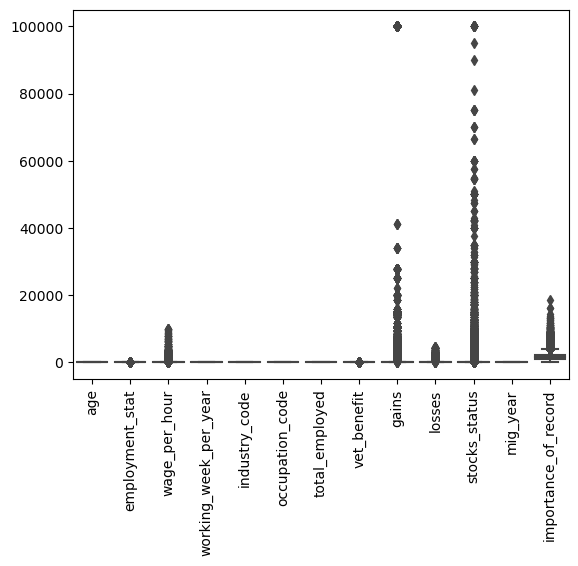

In [21]:
sns.boxplot(new_data)
plt.xticks(rotation = 90)
plt.show()

<p>from above plopt ['gains', ' stocks_status', 'importance_of_record' 'wage_per_hour']] - have a lot of outliers</p>

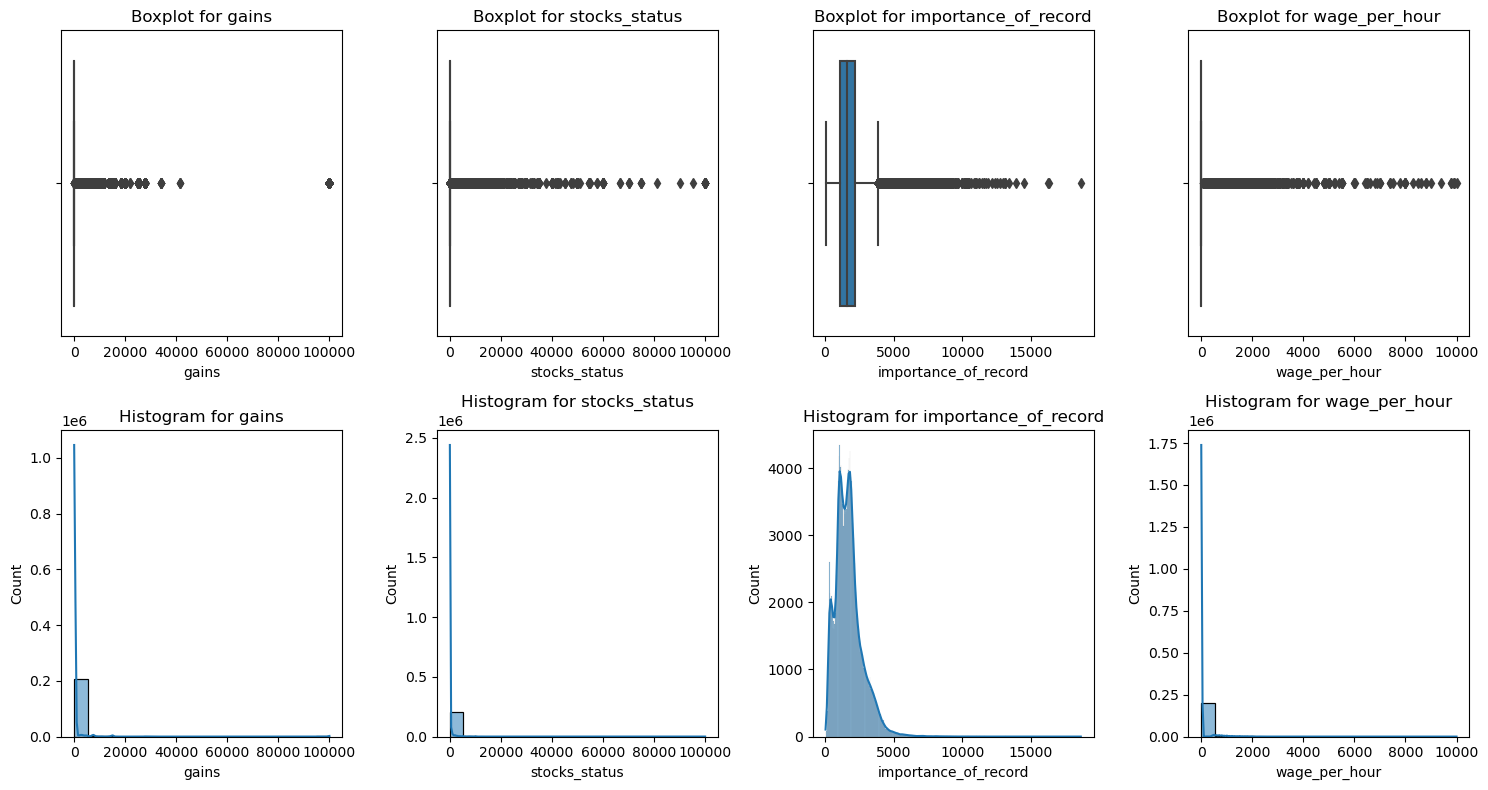

In [22]:
columns_to_plot = ['gains', 'stocks_status', 'importance_of_record', 'wage_per_hour']
num_columns = len(columns_to_plot)

fig, axes = plt.subplots(nrows=2, ncols=num_columns, figsize=(15, 8))
#to detect outliers
# Boxplots
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=new_data[column], ax=axes[0, i])
    axes[0, i].set_title(f'Boxplot for {column}')

# Histplots
for i, column in enumerate(columns_to_plot, start=num_columns):
    sns.histplot(x=new_data[column], ax=axes[1, i - num_columns], kde=True)
    axes[1, i - num_columns].set_title(f'Histogram for {column}')

plt.tight_layout()
plt.show()

<p><i>Dropping the outliers</i></p>

In [23]:
new_data = new_data.drop(columns_to_plot, axis = 1)

In [24]:
train_df.head()

,Age,class,New_class,education,New_education,marital_status,Current_martial_status,employment_commitment,Current stat wrt commitmnt,employment_stat,Updt employment_stat
0,79,NaN,No work,High school graduate,High school,Widowed,0,Not in labor force,Unemployed,0,Job
1,65,NaN,No work,High school graduate,High school,Widowed,0,Children or Armed Forces,Unemployed,0,Job
2,21,Federal government,Government,12th grade no diploma,Below high school,Never married,0,Children or Armed Forces,Unemployed,0,Job
3,2,NaN,No work,Children,Below high school,Never married,0,Children or Armed Forces,Unemployed,0,Job
4,70,NaN,No work,High school graduate,High school,Married-civilian spouse present,1,Not in labor force,Unemployed,0,Job


In [25]:
train_df['is_labor_union']=new_data['is_labor_union']

In [26]:
train_df['is_labor_union'].fillna('yes',inplace=True)#filling na values first

In [27]:
train_df['is_labor_unionup_dt']=train_df['is_labor_union'].map({'yes':1,'No':0,'Same':0})


In [28]:
train_df['working_week_per_year']=new_data['working_week_per_year']

In [29]:
train_df['industry_code']=new_data['industry_code']
train_df['industry_code_main']=new_data['industry_code_main']

In [30]:
train_df['occupation_code']=new_data['occupation_code']
train_df['occupation_code_main']=new_data['occupation_code_main']

In [31]:
train_df['total_employed']=new_data['total_employed'] 

In [32]:
train_df['household_stat']=new_data['household_stat'] 
x=train_df['household_stat'].unique()

In [33]:
train_df['household_summary']=new_data['household_summary'] 
train_df['household_summary'].unique()

array(['Householder', 'Child 18 or older', 'Child under 18 never married',
       'Spouse of householder', 'Nonrelative of householder',
       'Other relative of householder',
       'Group Quarters- Secondary individual',
       'Child under 18 ever married'], dtype=object)

In [34]:
train_df['under_18_family']=new_data['under_18_family'] 
train_df['updt_under_18_family']=train_df['under_18_family']
train_df['updt_under_18_family'].fillna('not under18',inplace=True)
train_df['updt_under_18_family']=train_df['updt_under_18_family'].map({'Both parents present':'parent_present', 'Mother only present':'Parent present',
       'Father only present':'Parent present','not under18':'not under18','Neither parent present':'Neither parent present'})
train_df['updt_under_18_family']=train_df['updt_under_18_family'].map({'parent_present':1,'not under18':0,'Neither parent present':2})

In [35]:
train_df['veterans_admin_questionnaire']=new_data['veterans_admin_questionnaire']
train_df['veterans_admin_questionnaire'].fillna('yes',inplace=True)
train_df['veterans_admin_questionnaire'].unique()


array(['yes', 'No', 'Same'], dtype=object)

In [36]:
train_df['veterans_admin_updt']=train_df['veterans_admin_questionnaire']
train_df['veterans_admin_updt'] = train_df['veterans_admin_questionnaire'].map({'same': 'no','yes':'yes','No':'no'})    
train_df['veterans_admin_updt']= train_df['veterans_admin_questionnaire'].map({'yes': 1,'no':0})  

In [37]:
train_df['vet_benefit']=new_data['vet_benefit']
train_df['vet_benefit'].unique()

array([2, 0, 1], dtype=int64)

In [38]:
train_df['tax_status']=new_data['tax_status']
train_df['tax_status'].unique()

array(['Head of household', 'Single', 'Nonfiler', 'Joint both 65+',
       'Joint both under 65', 'Joint one under 65 & one 65+'],
      dtype=object)

In [39]:
train_df['tax_stat_updt']=train_df['tax_status'].map({'Nonfiler':'nonfiller','Head of household':'filler', 'Single':'filler','Joint both 65+':'filler',
       'Joint both under 65':'filler', 'Joint one under 65 & one 65+':'filler'})
train_df['tax_stat_updt']=train_df['tax_stat_updt'].map({'filler':1,'nonfiller':0})

In [40]:
train_df['citizenship']=new_data['citizenship']
train_df['citizenship'].unique()

array(['Native', 'Foreign born- Not a citizen of U S ',
       'Foreign born- U S citizen by naturalization',
       'Native- Born abroad of American Parent(s)',
       'Native- Born in Puerto Rico or U S Outlying'], dtype=object)

In [41]:
citizenship_mapping = {"Native": "Citizen",
                    "Native- Born abroad of American Parent(s)": "Citizen",
                    "Native- Born in Puerto Rico or U S Outlying": "Citizen",
                    "Foreign born- U S citizen by naturalization": "Citizen",
                    "Foreign born- Not a citizen of U S": "Non-citizen"
                      }

In [42]:
train_df['ctz_updt']=train_df['citizenship'].map(citizenship_mapping)

In [43]:
#further mapping to binary values
train_df["ctz_updt"] = train_df["ctz_updt"].map({"Citizen": 1, "Non-citizen": 0})

In [44]:
train_df['income_above_limit']=new_data['income_above_limit']

In [45]:
train_df.head()

,Age,class,New_class,education,New_education,marital_status,Current_martial_status,employment_commitment,Current stat wrt commitmnt,employment_stat,...,under_18_family,updt_under_18_family,veterans_admin_questionnaire,veterans_admin_updt,vet_benefit,tax_status,tax_stat_updt,citizenship,ctz_updt,income_above_limit
0,79,NaN,No work,High school graduate,High school,Widowed,0,Not in labor force,Unemployed,0,...,NaN,0.0,yes,1.0,2,Head of household,1,Native,1.0,Below limit
1,65,NaN,No work,High school graduate,High school,Widowed,0,Children or Armed Forces,Unemployed,0,...,NaN,0.0,yes,1.0,2,Single,1,Native,1.0,Below limit
2,21,Federal government,Government,12th grade no diploma,Below high school,Never married,0,Children or Armed Forces,Unemployed,0,...,NaN,0.0,yes,1.0,2,Single,1,Native,1.0,Below limit
3,2,NaN,No work,Children,Below high school,Never married,0,Children or Armed Forces,Unemployed,0,...,Both parents present,1.0,yes,1.0,0,Nonfiler,0,Native,1.0,Below limit
4,70,NaN,No work,High school graduate,High school,Married-civilian spouse present,1,Not in labor force,Unemployed,0,...,NaN,0.0,yes,1.0,2,Joint both 65+,1,Native,1.0,Below limit


<h1>EDA</h1>

In [46]:
train_df.columns

Index(['Age', 'class', 'New_class', 'education', 'New_education',
       'marital_status', 'Current_martial_status', 'employment_commitment',
       'Current stat wrt commitmnt', 'employment_stat', 'Updt employment_stat',
       'is_labor_union', 'is_labor_unionup_dt', 'working_week_per_year',
       'industry_code', 'industry_code_main', 'occupation_code',
       'occupation_code_main', 'total_employed', 'household_stat',
       'household_summary', 'under_18_family', 'updt_under_18_family',
       'veterans_admin_questionnaire', 'veterans_admin_updt', 'vet_benefit',
       'tax_status', 'tax_stat_updt', 'citizenship', 'ctz_updt',
       'income_above_limit'],
      dtype='object')

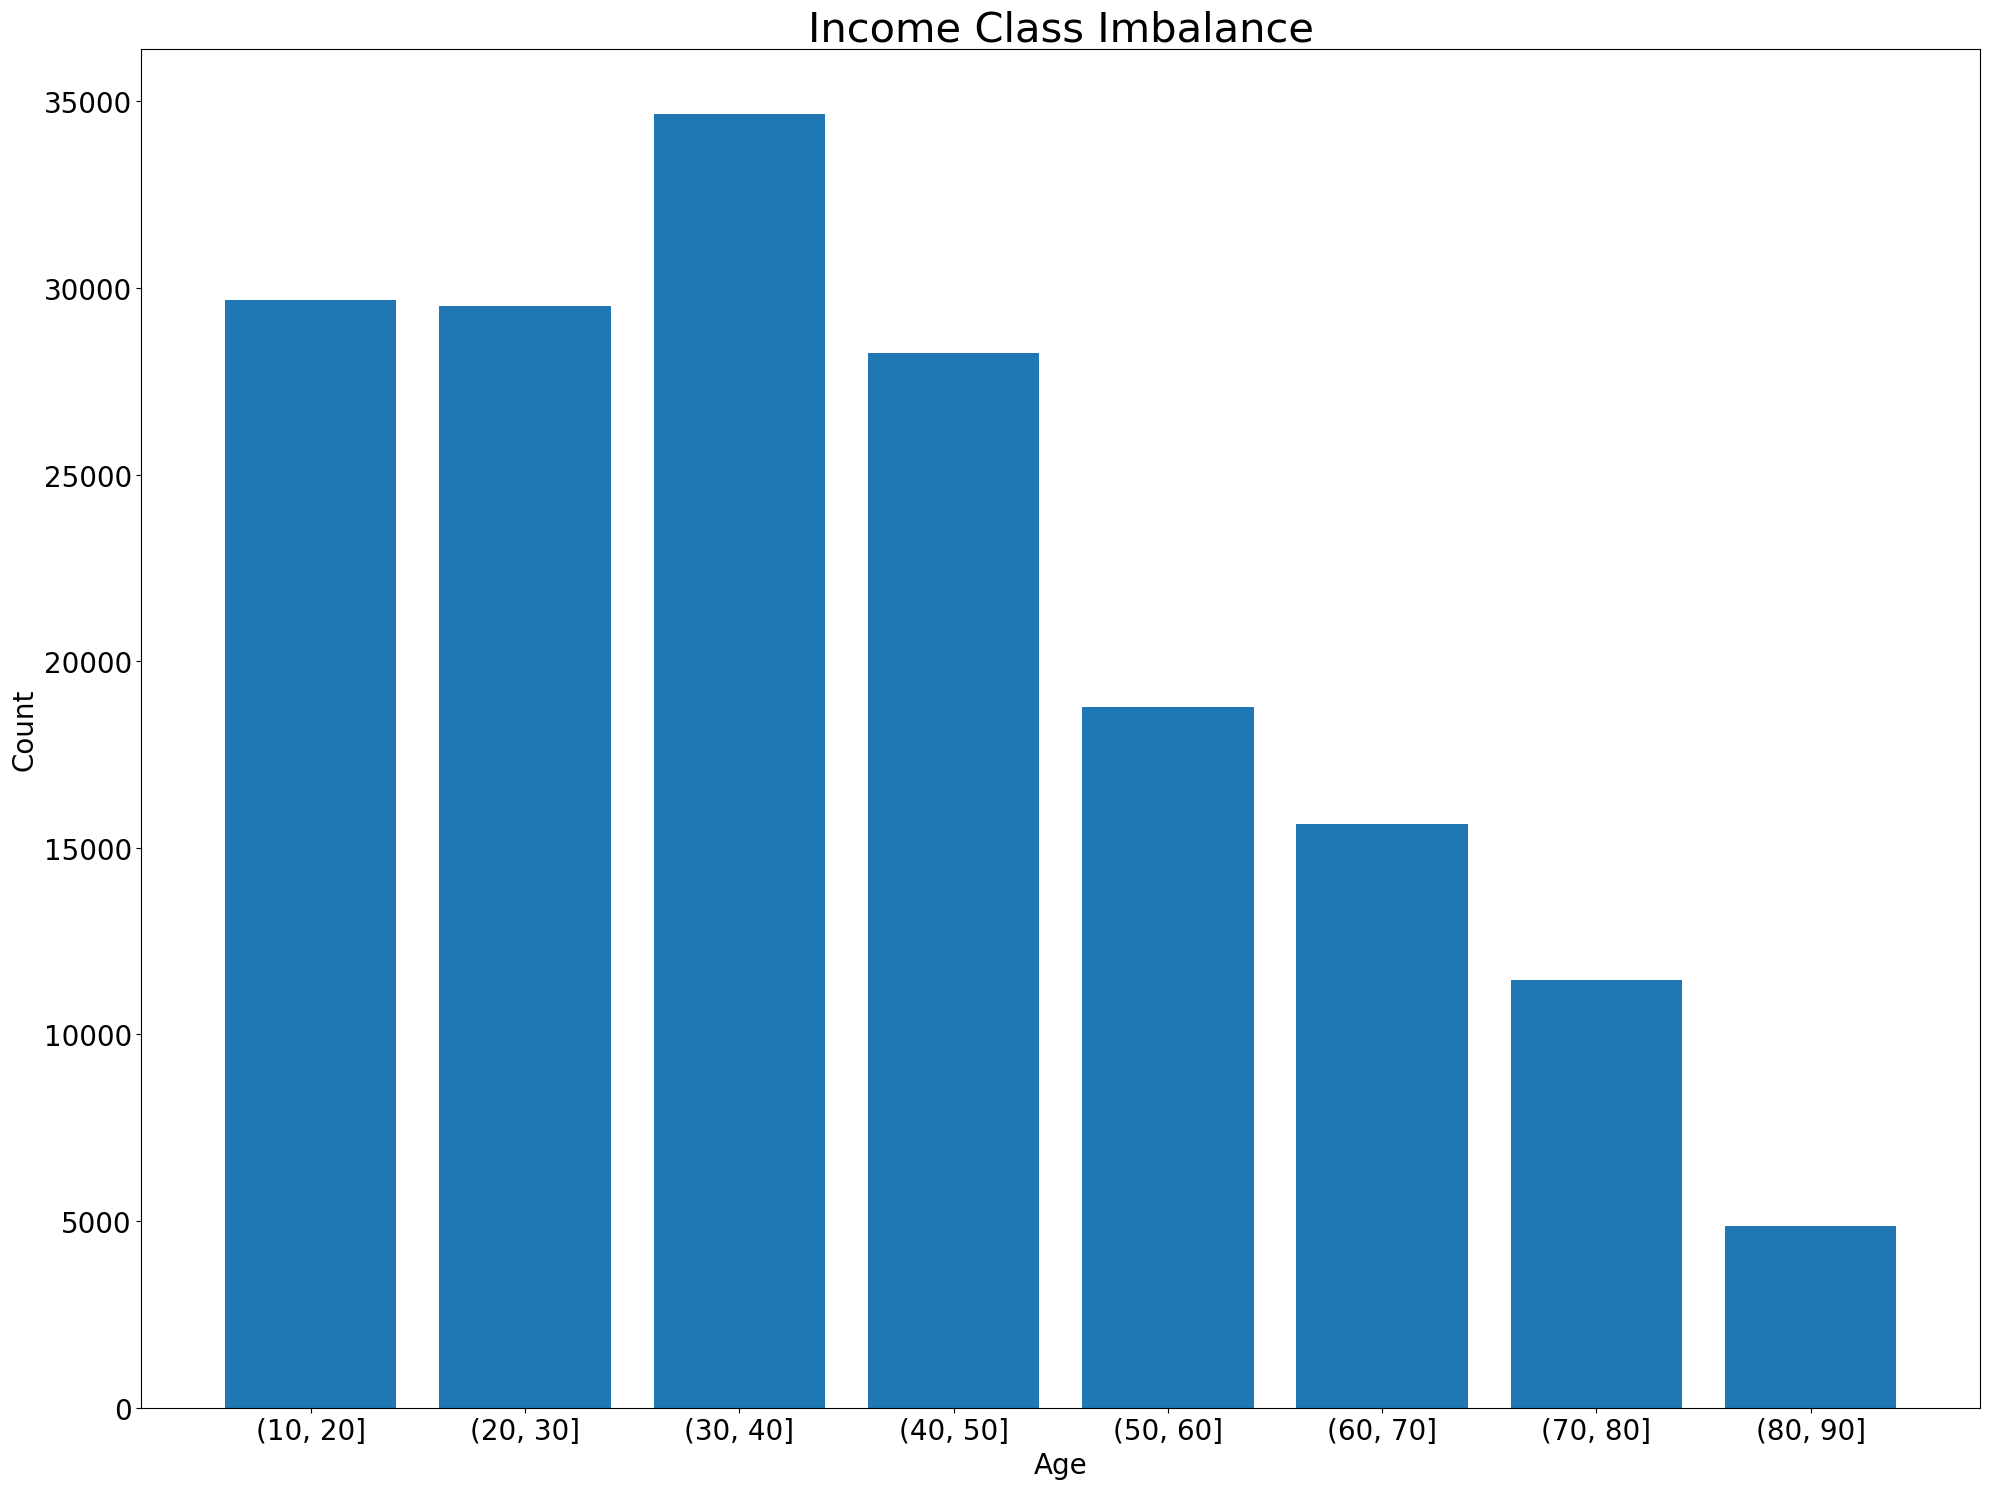

In [47]:
# Number of people in different age brackets.
## Group by age ranges (10-year intervals) and count occurrences of 'value'
grouped_age_data = train_df.groupby(pd.cut(train_df['Age'], range(10, 100, 10)))['Age'].size()

## Convet the index values into string values.

grouped_age_data.index = grouped_age_data.index.astype(str)

plt.figure(figsize=(20,15)) 
plt.yticks(fontsize=20)
plt.bar(grouped_age_data.index, grouped_age_data.values)
plt.xlabel("Age", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Income Class Imbalance", fontsize=30)
plt.xticks(rotation=0, fontsize=20) 
plt.tight_layout()
plt.show()

<p>The barplot above shows us that the population sampled comprises of younger aged participants i.e 10-40.</p>

In [48]:
train_df.head()

,Age,class,New_class,education,New_education,marital_status,Current_martial_status,employment_commitment,Current stat wrt commitmnt,employment_stat,...,under_18_family,updt_under_18_family,veterans_admin_questionnaire,veterans_admin_updt,vet_benefit,tax_status,tax_stat_updt,citizenship,ctz_updt,income_above_limit
0,79,NaN,No work,High school graduate,High school,Widowed,0,Not in labor force,Unemployed,0,...,NaN,0.0,yes,1.0,2,Head of household,1,Native,1.0,Below limit
1,65,NaN,No work,High school graduate,High school,Widowed,0,Children or Armed Forces,Unemployed,0,...,NaN,0.0,yes,1.0,2,Single,1,Native,1.0,Below limit
2,21,Federal government,Government,12th grade no diploma,Below high school,Never married,0,Children or Armed Forces,Unemployed,0,...,NaN,0.0,yes,1.0,2,Single,1,Native,1.0,Below limit
3,2,NaN,No work,Children,Below high school,Never married,0,Children or Armed Forces,Unemployed,0,...,Both parents present,1.0,yes,1.0,0,Nonfiler,0,Native,1.0,Below limit
4,70,NaN,No work,High school graduate,High school,Married-civilian spouse present,1,Not in labor force,Unemployed,0,...,NaN,0.0,yes,1.0,2,Joint both 65+,1,Native,1.0,Below limit


In [49]:
# Group by class and age, then calculate the count
class_age_counts = train_df.groupby('New_class')['Age'].size().reset_index(name='Count')
class_age_counts

,New_class,Count
0,Government,15620
1,No work,105861
2,Private,75617
3,Self employed,12401


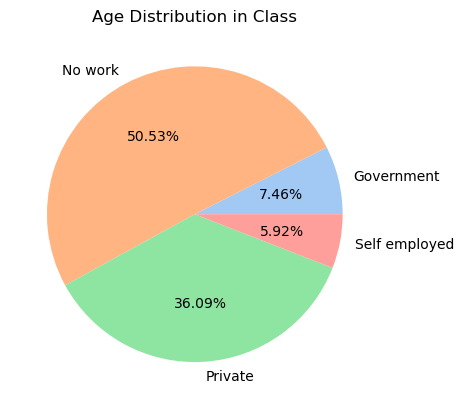

In [50]:
palette_color = sns.color_palette('pastel') 
plt.pie(class_age_counts['Count'], labels=class_age_counts['New_class'], colors=palette_color, autopct='%.2f%%')
plt.title('Age Distribution in Class')
plt.show()

from the above graph we found that 50.53% population is having no work that is it is either 65+ or a minor less than 18 in age so can not work, 36.09% work in private sector,5.92% self employed and 7.46% are government employee

In [51]:
train_df.New_education.unique()

array(['High school', 'Below high school', 'Undergraduate',
       'Postgraduate', nan], dtype=object)

In [52]:
train_df[['Age','New_education']]

,Age,New_education
0,79,High school
1,65,High school
2,21,Below high school
3,2,Below high school
4,70,High school
...,...,...
209494,16,Below high school
209495,78,Undergraduate
209496,8,Below high school
209497,26,Undergraduate


In [67]:
edu = train_df['Age'].astype(int)
edu=pd.DataFrame(edu)
edu['New_education'] = train_df['New_education'].astype(str)
edu

,Age,New_education
0,79,High school
1,65,High school
2,21,Below high school
3,2,Below high school
4,70,High school
...,...,...
209494,16,Below high school
209495,78,Undergraduate
209496,8,Below high school
209497,26,Undergraduate


In [68]:
edu['New_education'].unique()

array(['High school', 'Below high school', 'Undergraduate',
       'Postgraduate', 'nan'], dtype=object)

Here each ID shows their level of qualification of a person 

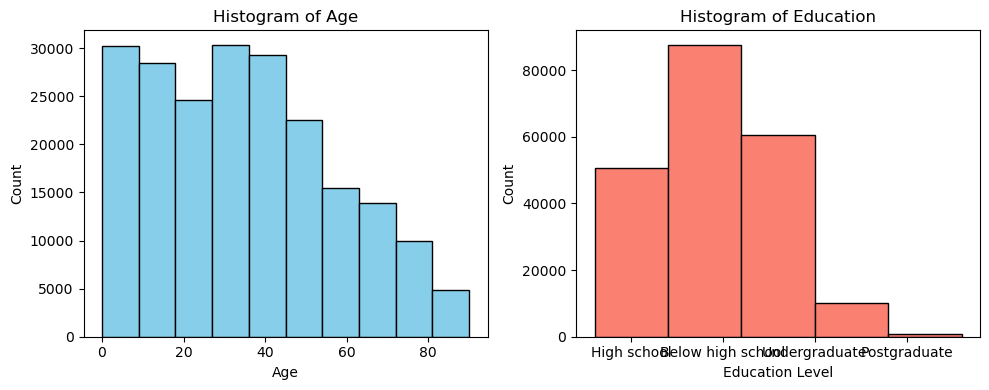

In [69]:
# Plotting the histogram for Age
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(edu['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')

# Plotting the histogram for Education
plt.subplot(1, 2, 2)
plt.hist(edu['New_education'], bins=len(edu['New_education'].unique()), color='salmon', edgecolor='black', align='left')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Histogram of Education')

plt.tight_layout()
plt.show()

In [ ]:
From the graph we can see how much of our population is educated 


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
edu['Age'] = label_encoder.fit_transform(edu['Age'])
edu['New_education'] = label_encoder.fit_transform(edu['New_education'])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


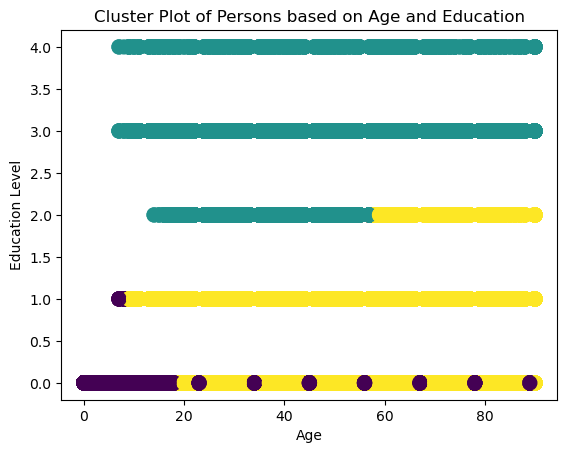

In [76]:
edu['Age'] = label_encoder.fit_transform(edu['Age'])
edu['New_education'] = label_encoder.fit_transform(edu['New_education'])

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(edu)

# Use k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
edu['Cluster'] = kmeans.fit_predict(df_scaled)

# Plotting the cluster plot
plt.scatter(edu['Age'], edu['New_education'], c=edu['Cluster'], cmap='viridis', s=100)
plt.xlabel('Age')
plt.ylabel('Education Level')
plt.title('Cluster Plot of Persons based on Age and Education')
plt.show()

A cluster of the same is done 